In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datalatih = pd.read_excel("data testing.xlsx")
datalatih.head(11)

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,98,98,98,3,1
1,Matematika,80,76,65,1,2
2,Sastra Inggris,62,77,82,2,1
3,Matematika,83,82,75,1,1
4,Sastra Inggris,96,75,68,1,1
5,Matematika,91,83,84,2,2
6,Sastra Indonesia,88,80,90,2,1
7,Sastra Indonesia,84,82,88,1,1
8,Sastra Inggris,79,89,85,1,1
9,Sastra Inggris,83,88,81,2,2


In [4]:
datalatih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Jurusan           11 non-null     object
 1   Matematika        11 non-null     int64 
 2   Bahasa Inggris    11 non-null     int64 
 3   Bahasa Indonesia  11 non-null     int64 
 4   Prestasi Siswa    11 non-null     int64 
 5   Prestasi Sekolah  11 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 656.0+ bytes


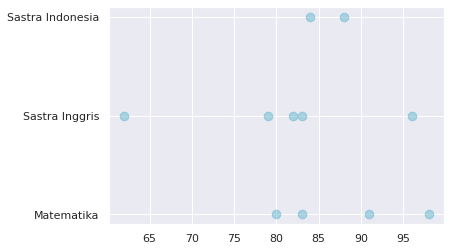

In [5]:
from sklearn.cluster import KMeans
plt.scatter(datalatih.Matematika, datalatih.Jurusan, s = 75, c = "c", marker = "o", alpha = 0.5)
plt.show()

In [6]:
x = datalatih.drop(["Jurusan"], axis=1)
x.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,98,98,98,3,1
1,80,76,65,1,2
2,62,77,82,2,1
3,83,82,75,1,1
4,96,75,68,1,1
5,91,83,84,2,2
6,88,80,90,2,1
7,84,82,88,1,1
8,79,89,85,1,1
9,83,88,81,2,2


In [7]:
y = datalatih["Jurusan"]
y.head(11)

0           Matematika
1           Matematika
2       Sastra Inggris
3           Matematika
4       Sastra Inggris
5           Matematika
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: Jurusan, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

modelnb = GaussianNB()

nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("data testing.xlsx")
datauji.head(11)

,Jurusan,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,Matematika,98,98,98,3,1
1,Matematika,80,76,65,1,2
2,Sastra Inggris,62,77,82,2,1
3,Matematika,83,82,75,1,1
4,Sastra Inggris,96,75,68,1,1
5,Matematika,91,83,84,2,2
6,Sastra Indonesia,88,80,90,2,1
7,Sastra Indonesia,84,82,88,1,1
8,Sastra Inggris,79,89,85,1,1
9,Sastra Inggris,83,88,81,2,2


In [10]:
x_test = datauji.drop(["Jurusan"], axis=1)
x_test.head(11)

,Matematika,Bahasa Inggris,Bahasa Indonesia,Prestasi Siswa,Prestasi Sekolah
0,98,98,98,3,1
1,80,76,65,1,2
2,62,77,82,2,1
3,83,82,75,1,1
4,96,75,68,1,1
5,91,83,84,2,2
6,88,80,90,2,1
7,84,82,88,1,1
8,79,89,85,1,1
9,83,88,81,2,2


In [11]:
y_uji = datauji["Jurusan"]
y_uji.head(11)

0           Matematika
1           Matematika
2       Sastra Inggris
3           Matematika
4       Sastra Inggris
5           Matematika
6     Sastra Indonesia
7     Sastra Indonesia
8       Sastra Inggris
9       Sastra Inggris
10      Sastra Inggris
Name: Jurusan, dtype: object

In [12]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['Matematika' 'Matematika' 'Sastra Inggris' 'Sastra Inggris' 'Matematika'
 'Matematika' 'Sastra Indonesia' 'Sastra Indonesia' 'Sastra Inggris'
 'Matematika' 'Sastra Inggris']


In [13]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.7272727272727273


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

                  precision    recall  f1-score   support

      Matematika       0.60      0.75      0.67         4
Sastra Indonesia       1.00      1.00      1.00         2
  Sastra Inggris       0.75      0.60      0.67         5

        accuracy                           0.73        11
       macro avg       0.78      0.78      0.78        11
    weighted avg       0.74      0.73      0.73        11

